In [1]:
import sys
#sys.path.insert(1, '/content/drive/MyDrive/Credentials/')
from credit_x import *

In [2]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials


#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= client_id,
                                                           client_secret= client_secret))

In [5]:
#Playlist I want to scrap

playlist_id="7htu5ftbLBRFAwiuHVcUAg"
username="spotify"

playlist = sp.user_playlist_tracks(username, playlist_id)

In [6]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

tracks=get_playlist_tracks(username, playlist_id)

In [7]:
def get_playlist_info(tracks):
    
    playlist_dict={}

    for i in range(len(tracks)):
        id_list=[]
        id_list.append(tracks[i]["track"]["name"])
        #trackname=playlist["items"][s]["track"]["name"]
        for j in range(len(tracks[i]["track"]["artists"])):
            id_list.append(tracks[i]["track"]["artists"][j]["name"])
            
        playlist_dict[tracks[i]["track"]["id"]]=id_list
        
    return playlist_dict

playlist_dict=get_playlist_info(tracks)

In [8]:
def features(tracks):
    song_features = {}
    for i in range(len(tracks)):
        song_features[tracks[i]["track"]["id"]] = sp.audio_features(tracks[i]["track"]["uri"])
    return song_features

big_spotify=features(tracks)

In [9]:
song_id=list(big_spotify.keys()) 
print(len(song_id))

9968


In [11]:
import pandas as pd

def get_features(song_features): 
    
    song_id=list(song_features.keys()) 
    features=list(song_features[song_id[0]][0])

    feature_dict={}

    for i in range(len(features)):
        value_list=[]

        for n in range(len(song_features)): 

            result=song_features[song_id[n]][0][features[i]]
            value_list.append(result)
            #print(result)
            feature_dict[features[i]]=value_list

    df=pd.DataFrame.from_dict(feature_dict)

    return df

df = get_features(big_spotify)

In [14]:
df_original=df

df_original.to_csv("/Users/carolinvogt/Becoming_Data_Analyst/Week_07/Day_03/lab-api-wrappers/df_original.csv")

In [15]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.511,0.472,4,-9.277,1,0.0910,0.534,0.614000,0.1100,0.0399,127.978,audio_features,2MvvoeRt8NcOXWESkxWn3g,spotify:track:2MvvoeRt8NcOXWESkxWn3g,https://api.spotify.com/v1/tracks/2MvvoeRt8NcO...,https://api.spotify.com/v1/audio-analysis/2Mvv...,258969,4
1,0.742,0.546,1,-7.694,1,0.0315,0.172,0.380000,0.1150,0.8680,104.996,audio_features,6UFivO2zqqPFPoQYsEMuCc,spotify:track:6UFivO2zqqPFPoQYsEMuCc,https://api.spotify.com/v1/tracks/6UFivO2zqqPF...,https://api.spotify.com/v1/audio-analysis/6UFi...,260520,4
2,0.609,0.629,10,-5.024,1,0.0264,0.425,0.000000,0.0978,0.3250,99.955,audio_features,4Musyaro0NM5Awx8b5c627,spotify:track:4Musyaro0NM5Awx8b5c627,https://api.spotify.com/v1/tracks/4Musyaro0NM5...,https://api.spotify.com/v1/audio-analysis/4Mus...,241467,4
3,0.729,0.756,8,-5.119,1,0.0294,0.131,0.000000,0.0527,0.5220,104.945,audio_features,1CkvWZme3pRgbzaxZnTl5X,spotify:track:1CkvWZme3pRgbzaxZnTl5X,https://api.spotify.com/v1/tracks/1CkvWZme3pRg...,https://api.spotify.com/v1/audio-analysis/1Ckv...,228293,4
4,0.706,0.558,2,-7.237,0,0.0593,0.146,0.000000,0.1180,0.2270,110.443,audio_features,4lLtanYk6tkMvooU0tWzG8,spotify:track:4lLtanYk6tkMvooU0tWzG8,https://api.spotify.com/v1/tracks/4lLtanYk6tkM...,https://api.spotify.com/v1/audio-analysis/4lLt...,223253,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,0.415,0.339,0,-10.278,1,0.0316,0.703,0.000000,0.1750,0.3400,131.765,audio_features,2foI6dVPMRC7B3qwjca19u,spotify:track:2foI6dVPMRC7B3qwjca19u,https://api.spotify.com/v1/tracks/2foI6dVPMRC7...,https://api.spotify.com/v1/audio-analysis/2foI...,213747,3
9964,0.494,0.531,7,-8.146,1,0.4180,0.586,0.000000,0.3250,0.2120,79.220,audio_features,1ZfK0enTcbDvb3LznGG7Wl,spotify:track:1ZfK0enTcbDvb3LznGG7Wl,https://api.spotify.com/v1/tracks/1ZfK0enTcbDv...,https://api.spotify.com/v1/audio-analysis/1ZfK...,170427,4
9965,0.534,0.802,7,-4.669,0,0.2190,0.154,0.000004,0.1710,0.7480,179.998,audio_features,1GE57bvEZMZijuQAbQve3H,spotify:track:1GE57bvEZMZijuQAbQve3H,https://api.spotify.com/v1/tracks/1GE57bvEZMZi...,https://api.spotify.com/v1/audio-analysis/1GE5...,195957,4
9966,0.499,0.468,0,-9.995,0,0.0396,0.795,0.880000,0.0899,0.0763,141.463,audio_features,7jA5OcunWRSYXq98puhAX8,spotify:track:7jA5OcunWRSYXq98puhAX8,https://api.spotify.com/v1/tracks/7jA5OcunWRSY...,https://api.spotify.com/v1/audio-analysis/7jA5...,157000,4


In [16]:
df.set_index('id',inplace=True)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
id,,,,,,,,,,,,,,,,,
2MvvoeRt8NcOXWESkxWn3g,0.511,0.472,4,-9.277,1,0.0910,0.534,0.614000,0.1100,0.0399,127.978,audio_features,spotify:track:2MvvoeRt8NcOXWESkxWn3g,https://api.spotify.com/v1/tracks/2MvvoeRt8NcO...,https://api.spotify.com/v1/audio-analysis/2Mvv...,258969,4
6UFivO2zqqPFPoQYsEMuCc,0.742,0.546,1,-7.694,1,0.0315,0.172,0.380000,0.1150,0.8680,104.996,audio_features,spotify:track:6UFivO2zqqPFPoQYsEMuCc,https://api.spotify.com/v1/tracks/6UFivO2zqqPF...,https://api.spotify.com/v1/audio-analysis/6UFi...,260520,4
4Musyaro0NM5Awx8b5c627,0.609,0.629,10,-5.024,1,0.0264,0.425,0.000000,0.0978,0.3250,99.955,audio_features,spotify:track:4Musyaro0NM5Awx8b5c627,https://api.spotify.com/v1/tracks/4Musyaro0NM5...,https://api.spotify.com/v1/audio-analysis/4Mus...,241467,4
1CkvWZme3pRgbzaxZnTl5X,0.729,0.756,8,-5.119,1,0.0294,0.131,0.000000,0.0527,0.5220,104.945,audio_features,spotify:track:1CkvWZme3pRgbzaxZnTl5X,https://api.spotify.com/v1/tracks/1CkvWZme3pRg...,https://api.spotify.com/v1/audio-analysis/1Ckv...,228293,4
4lLtanYk6tkMvooU0tWzG8,0.706,0.558,2,-7.237,0,0.0593,0.146,0.000000,0.1180,0.2270,110.443,audio_features,spotify:track:4lLtanYk6tkMvooU0tWzG8,https://api.spotify.com/v1/tracks/4lLtanYk6tkM...,https://api.spotify.com/v1/audio-analysis/4lLt...,223253,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2foI6dVPMRC7B3qwjca19u,0.415,0.339,0,-10.278,1,0.0316,0.703,0.000000,0.1750,0.3400,131.765,audio_features,spotify:track:2foI6dVPMRC7B3qwjca19u,https://api.spotify.com/v1/tracks/2foI6dVPMRC7...,https://api.spotify.com/v1/audio-analysis/2foI...,213747,3
1ZfK0enTcbDvb3LznGG7Wl,0.494,0.531,7,-8.146,1,0.4180,0.586,0.000000,0.3250,0.2120,79.220,audio_features,spotify:track:1ZfK0enTcbDvb3LznGG7Wl,https://api.spotify.com/v1/tracks/1ZfK0enTcbDv...,https://api.spotify.com/v1/audio-analysis/1ZfK...,170427,4
1GE57bvEZMZijuQAbQve3H,0.534,0.802,7,-4.669,0,0.2190,0.154,0.000004,0.1710,0.7480,179.998,audio_features,spotify:track:1GE57bvEZMZijuQAbQve3H,https://api.spotify.com/v1/tracks/1GE57bvEZMZi...,https://api.spotify.com/v1/audio-analysis/1GE5...,195957,4


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9968 entries, 2MvvoeRt8NcOXWESkxWn3g to 21jGcNKet2qwijlDFuPiPb
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      9968 non-null   float64
 1   energy            9968 non-null   float64
 2   key               9968 non-null   int64  
 3   loudness          9968 non-null   float64
 4   mode              9968 non-null   int64  
 5   speechiness       9968 non-null   float64
 6   acousticness      9968 non-null   float64
 7   instrumentalness  9968 non-null   float64
 8   liveness          9968 non-null   float64
 9   valence           9968 non-null   float64
 10  tempo             9968 non-null   float64
 11  type              9968 non-null   object 
 12  uri               9968 non-null   object 
 13  track_href        9968 non-null   object 
 14  analysis_url      9968 non-null   object 
 15  duration_ms       9968 non-null   int64  
 16  time_sig

In [19]:
df.drop(["type","uri","track_href","analysis_url"],axis=1,inplace=True)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,,,,,,,,,,,,,
2MvvoeRt8NcOXWESkxWn3g,0.511,0.472,4,-9.277,1,0.0910,0.534,0.614000,0.1100,0.0399,127.978,258969,4
6UFivO2zqqPFPoQYsEMuCc,0.742,0.546,1,-7.694,1,0.0315,0.172,0.380000,0.1150,0.8680,104.996,260520,4
4Musyaro0NM5Awx8b5c627,0.609,0.629,10,-5.024,1,0.0264,0.425,0.000000,0.0978,0.3250,99.955,241467,4
1CkvWZme3pRgbzaxZnTl5X,0.729,0.756,8,-5.119,1,0.0294,0.131,0.000000,0.0527,0.5220,104.945,228293,4
4lLtanYk6tkMvooU0tWzG8,0.706,0.558,2,-7.237,0,0.0593,0.146,0.000000,0.1180,0.2270,110.443,223253,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2foI6dVPMRC7B3qwjca19u,0.415,0.339,0,-10.278,1,0.0316,0.703,0.000000,0.1750,0.3400,131.765,213747,3
1ZfK0enTcbDvb3LznGG7Wl,0.494,0.531,7,-8.146,1,0.4180,0.586,0.000000,0.3250,0.2120,79.220,170427,4
1GE57bvEZMZijuQAbQve3H,0.534,0.802,7,-4.669,0,0.2190,0.154,0.000004,0.1710,0.7480,179.998,195957,4


In [20]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [21]:
df_prep = StandardScaler().fit_transform(df)

In [28]:
def auto_kmeans(df,limit):
    
    n=1
    k_means_dict={}
    
    while n!=limit:
    
        n=n+1

        kmeans = KMeans(n_clusters=8,
                    init="random",
                    n_init=n,  # try with 1, 4, 8, 20, 30, 100...
                    max_iter=2,
                    tol=0, ##stop after max_iter or if this value is reached
                    algorithm="full",
                    random_state=1234)
        kmeans.fit(df)

        k_means_dict[n]=kmeans.inertia_
        
        key_minimum=min(k_means_dict, key=k_means_dict.get)
        value_minimum=k_means_dict[key_minimum]
        
    return key_minimum, value_minimum

In [29]:
key_minimum, value_minimum=auto_kmeans(df_prep,200)
key_minimum, value_minimum

KeyboardInterrupt: 

## Chosing K

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

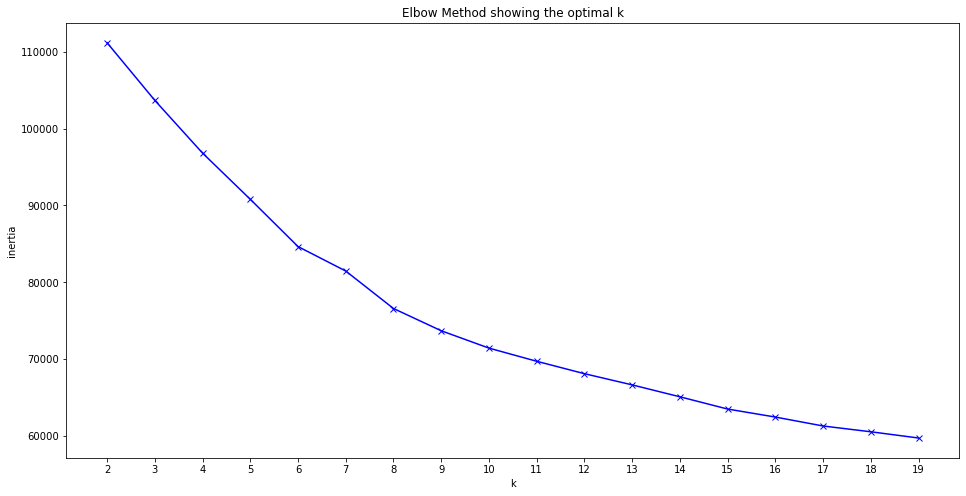

In [30]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_prep)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

## Silouhette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

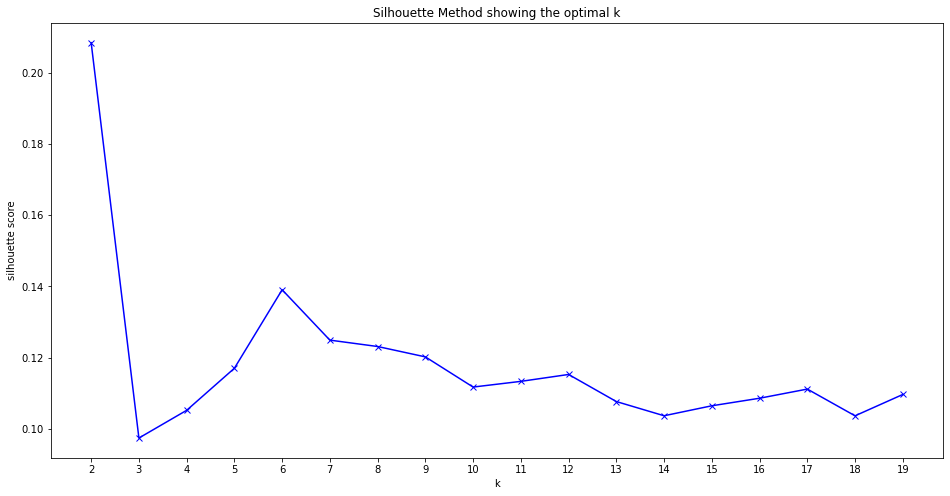

In [33]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_prep)
    silhouette.append(silhouette_score(df_prep, kmeans.predict(df_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')